# ACOUSTIC EXTINGUISHER FIRE DATASET

The dataset was gathered after four separate fuel flames were put out using a sound wave extinguishing apparatus. With this experimental set-up, 17,442 tests were carried out in all. The fuel container size features in the dataset correspond to the flame size, fuel type, frequency, decibel, distance, airflow, and status of flame extinction.

Based on the provided criteria, our goal is to forecast whether or not the flame will go out.


## Used Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset

In [39]:
dataset = pd.read_excel('Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')
dataset.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


## Data

The size of the dataset (lines, columns):

In [40]:
dataset.shape

(17442, 7)

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [42]:
dataset.corr(numeric_only = True)

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000e+00,-2.437871e-15,-6.125585e-15,1.677898e-16,9.978281e-17,-0.096947
DISTANCE,-2.437871e-15,1.000000e+00,-2.385897e-01,-7.074906e-01,-2.452947e-17,-0.644051
DESIBEL,-6.125585e-15,-2.385897e-01,1.000000e+00,3.769153e-01,5.617409e-01,0.203970
AIRFLOW,1.677898e-16,-7.074906e-01,3.769153e-01,1.000000e+00,-2.120462e-01,0.760628
FREQUENCY,9.978281e-17,-2.452947e-17,5.617409e-01,-2.120462e-01,1.000000e+00,-0.244203
STATUS,-9.694718e-02,-6.440506e-01,2.039698e-01,7.606279e-01,-2.442030e-01,1.000000


In [43]:
dataset.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [44]:
dataset.describe(include=["object"])

,FUEL
count,17442
unique,4
top,gasoline
freq,5130


Short explanation of each column:

- <b>Size - </b>If utilizing liquid fuel, there are five different sizes of cans that can be used to adjust the size of the flames, or there are two different gas adjustments for LPG fuel. 7, 12, 14, 16 and 20 centimeters are represented as 1 to 5, respectively, and 6 and 7 constitute the half throttle and the full throttle setting.
- <b>Distance - </b>The gasoline container was brought forward up to 190 cm throughout each experiment by advancing it from a distance of 10 cm each time. 
- <b>Decibel - </b>The decibel meter was moved in the same ditances as described above. 
- <b>Airflow - </b>The decibel meter was moved in the same ditances as described above. 
- <b>Frequency - </b>The aenometer was moved in the same ditances as described above.  
- <b>Fuel - </b>The flame was produced with LPG fuel and three different liquid fuels.
- <b>Status - </b>0 for non-extinction states or 1 for flame extinction.

The first six columns are input variables from the dataset that can be used to forecast the status attribute, which is the output variable.

## Pre-processing

In [45]:
dataset['FUEL'].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

As we can see, there are no incorrectly added fuel types

In [46]:
if any(dataset['DISTANCE'] < 10) or any(dataset['DISTANCE'] > 190):
    print("There are distances outside the range of 10 to 190")
else:
    print("All distances are within the range of 10 to 190")

All distances are within the range of 10 to 190


In [47]:
fuel_size_dict = {'lpg': [6, 7], 'gasoline': [1, 2, 3, 4, 5], 'kerosene': [1, 2, 3, 4, 5], 'thinner': [1, 2, 3, 4, 5]}

# clean size column based on fuel type
for fuel_type, acceptable_sizes in fuel_size_dict.items():
    dataset.loc[(dataset['FUEL'] == fuel_type) & (~dataset['SIZE'].isin(acceptable_sizes)), 'SIZE'] = None

dataset.dropna(subset=['SIZE'], inplace=True)

dataset['SIZE'].unique()


array([1., 2., 3., 4., 5., 6., 7.])

In [48]:
if any(dataset['DESIBEL'] < 72) or any(dataset['DESIBEL'] > 113):
    print("There are decibels outside the range of 72 to 113")
else:
    print("All decibels are within the range of 72 to 113")

All decibels are within the range of 72 to 113


In [49]:
if any(dataset['AIRFLOW'] < 0) or any(dataset['AIRFLOW'] > 17):
    print("There are levels of airflow outside the range of 0 to 17")
else:
    print("All levels of airflow are within the range of 0 to 17")

All levels of airflow are within the range of 0 to 17


In [50]:
if any(dataset['FREQUENCY'] < 1) or any(dataset['FREQUENCY'] > 75):
    print("There are frequencies outside the range of 1 to 75")
else:
    print("All frequencies are within the range of 1 to 75")

All frequencies are within the range of 1 to 75


In [51]:
if dataset[~dataset['STATUS'].isin([0,1])].empty:
    print("There is no data where the status column is neither 0 nor 1")
else:
    print("There are invalid status")

There is no data where the status column is neither 0 nor 1


In [52]:
duplicates = dataset.duplicated(keep=False)
dataset.drop_duplicates(keep=False, inplace=True)

# display any duplicate rows
if duplicates.any():
    print("Duplicate rows:")
    print(dataset[duplicates])
else:
    print("There are no duplicate rows in the dataset.")

There are no duplicate rows in the dataset.


In [53]:
# calculate skewness of each column
skewness = dataset.skew(numeric_only = True)

# display columns with skewness greater than 1 or less than -1
skewed_columns = skewness[(skewness > 1) | (skewness < -1)]
if len(skewed_columns) == 0:
    print("There are no skewed columns in the dataset.")
else:
    print("Skewed columns:")
    print(skewed_columns)
    
    # apply logarithmic transformation to skewed columns
    for col in skewed_columns.index:
        dataset[col] = np.log1p(dataset[col])
    
    print("Logarithmic transformation applied to skewed columns.")

There are no skewed columns in the dataset.


To finish the preprocessing section, we switched the ``fuel`` category to numerical values.

In [54]:
# create a dictionary to map fuel categories to numerical values
fuel_map = {'gasoline': 1, 'kerosene': 2, 'thinner': 3, 'lpg': 4}

# replace fuel categories with numerical values using the map() function
dataset['FUEL'] = dataset['FUEL'].map(fuel_map)

## Data Analysis

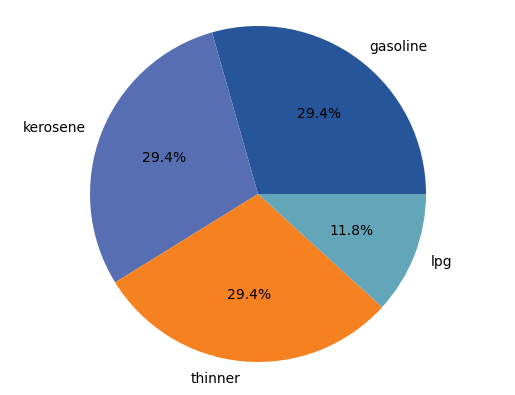

In [57]:
gasoline = dataset.loc[dataset['FUEL'] == 1]
kerosene = dataset.loc[dataset['FUEL'] == 2]
thinner = dataset.loc[dataset['FUEL'] == 3]
lpg = dataset.loc[dataset['FUEL'] == 4]

data = [gasoline.shape[0], kerosene.shape[0], thinner.shape[0], lpg.shape[0]]

fig1, axis = plt.subplots()
colors = ( "#265599","#576eb2","#f58120", "#63a6b9") 
axis.pie(data, colors = colors, labels=['gasoline', 'kerosene', 'thinner',  'lpg'], autopct='%1.1f%%',)
axis.axis('equal')  
plt.show()

As we can see, the sample size for the liquid fuels is much bigger than for lpg. 